In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('regional_master_50000009.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [3]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


In [4]:
df.dtypes

TOTAL_SALES    int64
dtype: object

In [6]:
# columns_to_read = ['YEARWEEK', 'SALES']

# df = pd.read_parquet('/Users/harshitgupta/Desktop/vs /VS-Data-Den/data_cleaning/sales_historic_1.parquet', columns=columns_to_read , parse_dates=['YEARWEEK'])


In [6]:
# df = df.dropna(subset=['TOTAL_SALES'])  
# df = df[df['TOTAL_SALES'] >= 1]         



# df.reset_index(drop=True, inplace=True)

In [7]:
df.dtypes

TOTAL_SALES    float64
dtype: object

In [4]:
df.head(10)

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595
2018-02-05,1307115
2018-02-12,1117782
2018-02-19,1163045
2018-02-26,2118990


<Axes: xlabel='YEARWEEK'>

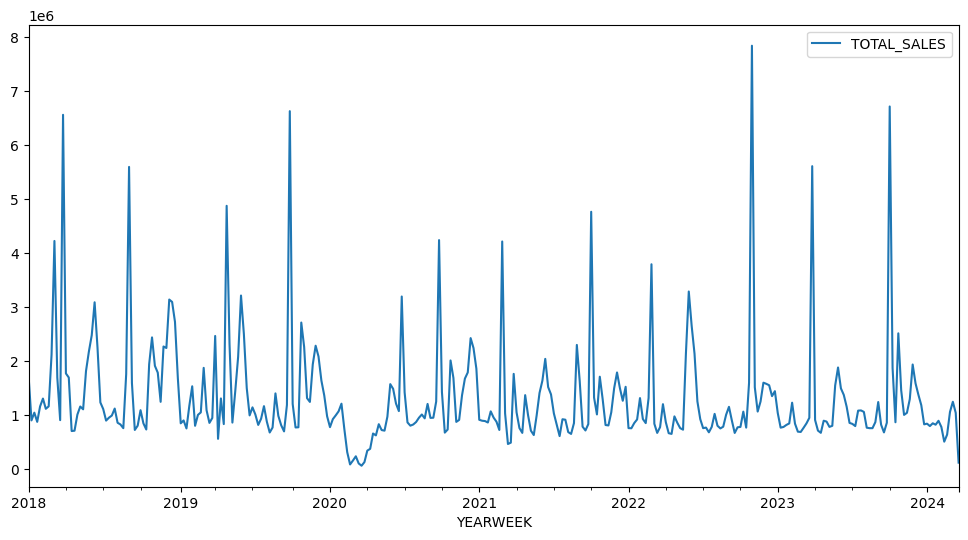

In [5]:
df.plot(figsize=(12,6))

NOT SEEING SEASONALITY

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [7]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))


In [8]:
adf_test(df['TOTAL_SALES'])

ADF Statistic: -14.429
p-value: 0.000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [9]:
df_diff = df['TOTAL_SALES'].diff().dropna()

In [10]:
adf_test(df_diff)

ADF Statistic: -9.296
p-value: 0.000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [11]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,1721999
2018-01-08,902891
2018-01-15,1046163
2018-01-22,876159
2018-01-29,1161595


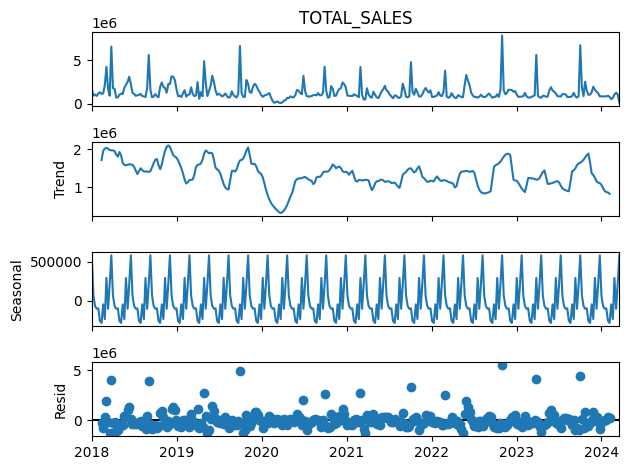

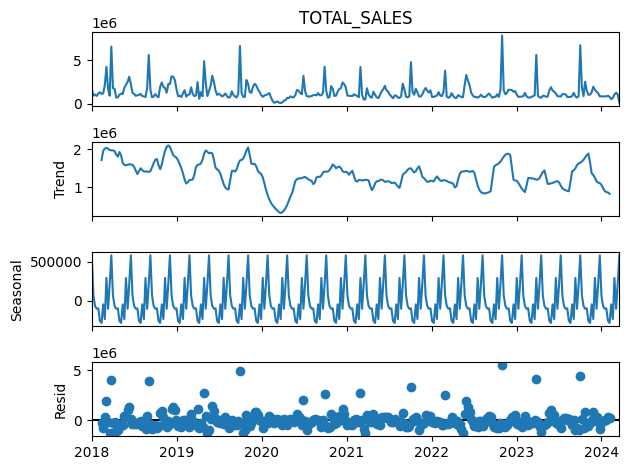

In [7]:
results = seasonal_decompose(df['TOTAL_SALES'], period=12)
results.plot()

In [8]:
len(df)

325

In [10]:
train = df.iloc[:260]
test = df.iloc[260:]

In [12]:
test.count

<bound method DataFrame.count of             TOTAL_SALES
YEARWEEK               
2022-12-26      1444021
2023-01-02      1038551
2023-01-09       768527
2023-01-16       781588
2023-01-23       818896
...                 ...
2024-02-19       640202
2024-02-26      1060437
2024-03-04      1247705
2024-03-11      1042492
2024-03-18       120695

[65 rows x 1 columns]>

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
df.head(),df.tail()

(            TOTAL_SALES
 YEARWEEK               
 2018-01-01      1721999
 2018-01-08       902891
 2018-01-15      1046163
 2018-01-22       876159
 2018-01-29      1161595,
             TOTAL_SALES
 YEARWEEK               
 2024-02-19       640202
 2024-02-26      1060437
 2024-03-04      1247705
 2024-03-11      1042492
 2024-03-18       120695)

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [17]:
n_input = 3


n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [18]:
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.21325037 0.10789863 0.12632594]
Predict this y: 
 [[0.10446042]]


In [19]:

X.shape

(1, 3, 1)

In [20]:
n_input = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [21]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.losses import Huber
     

In [22]:
# define mode

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

2024-04-18 18:03:21.156211: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-18 18:03:21.156275: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-18 18:03:21.156285: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-18 18:03:21.156647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 18:03:21.156667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. W

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:

model.fit(generator,epochs=20)

Epoch 1/20


2024-04-18 18:03:28.221041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0792
Epoch 2/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0758
Epoch 3/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0721
Epoch 4/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0580
Epoch 5/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0779
Epoch 6/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0791
Epoch 7/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0625
Epoch 8/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0707
Epoch 9/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0597
Epoch 10/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0562
Epoch 11/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0519
Epoch 12/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0682
Epoch 13/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0697
Epoch 14/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0674
Epoch 15/20
257/257 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step 

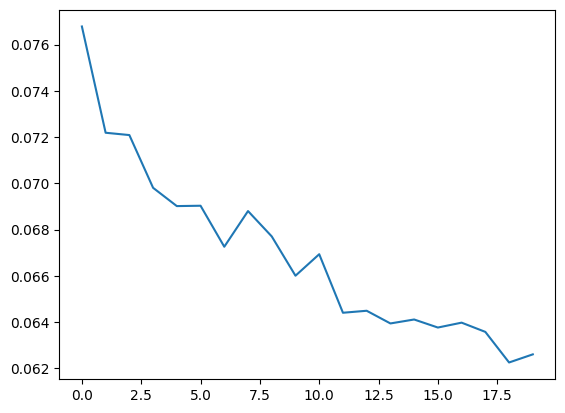

In [25]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [26]:
last_train_batch = scaled_train[-12:]

In [29]:
n_input = 12
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [30]:
last_train_batch

array([[[0.092402  ],
        [0.12883411],
        [0.09073988],
        [0.19750783],
        [1.        ],
        [0.18682124],
        [0.1289181 ],
        [0.1528204 ],
        [0.19773792],
        [0.19501252],
        [0.19160608],
        [0.16571509]]])

In [31]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


array([[0.37995315]], dtype=float32)

In [32]:
scaled_test[0]

array([0.17749749])

In [33]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    

    test_predictions.append(current_pred) 
   
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [34]:
test_predictions

[array([0.37995315], dtype=float32),
 array([0.70368683], dtype=float32),
 array([0.79094934], dtype=float32),
 array([0.8824333], dtype=float32),
 array([1.0282393], dtype=float32),
 array([0.8734988], dtype=float32),
 array([0.6812786], dtype=float32),
 array([0.7802243], dtype=float32),
 array([0.8356756], dtype=float32),
 array([0.93648165], dtype=float32),
 array([1.1043509], dtype=float32),
 array([1.211995], dtype=float32),
 array([1.5310458], dtype=float32),
 array([1.8176616], dtype=float32),
 array([2.2758298], dtype=float32),
 array([1.9570972], dtype=float32),
 array([2.0164485], dtype=float32),
 array([4.9413877], dtype=float32),
 array([2.802417], dtype=float32),
 array([2.6751213], dtype=float32),
 array([12.40317], dtype=float32),
 array([5.4752865], dtype=float32),
 array([15.493528], dtype=float32),
 array([30.328495], dtype=float32),
 array([-21.983267], dtype=float32),
 array([85.17971], dtype=float32),
 array([10.97496], dtype=float32),
 array([181.52669], dtype=fl

In [35]:
test.head()

,TOTAL_SALES
YEARWEEK,
2022-12-26,1444021
2023-01-02,1038551
2023-01-09,768527
2023-01-16,781588
2023-01-23,818896


In [36]:
true_predictions = scaler.inverse_transform(test_predictions)

In [37]:
true_predictions

array([[ 3.01811025e+06],
       [ 5.53513417e+06],
       [ 6.21359871e+06],
       [ 6.92488487e+06],
       [ 8.05852369e+06],
       [ 6.85541930e+06],
       [ 5.36091043e+06],
       [ 6.13021185e+06],
       [ 6.56134456e+06],
       [ 7.34510994e+06],
       [ 8.65029066e+06],
       [ 9.48722156e+06],
       [ 1.19678360e+07],
       [ 1.41962694e+07],
       [ 1.77585189e+07],
       [ 1.52803782e+07],
       [ 1.57418338e+07],
       [ 3.84831860e+07],
       [ 2.18527258e+07],
       [ 2.08630037e+07],
       [ 9.64984140e+07],
       [ 4.26342403e+07],
       [ 1.20525901e+08],
       [ 2.35867514e+08],
       [-1.70855545e+08],
       [ 6.62334781e+08],
       [ 8.53941110e+07],
       [ 1.41143089e+09],
       [ 3.85915145e+09],
       [ 5.58300764e+09],
       [ 1.80539257e+10],
       [ 5.65374461e+09],
       [ 3.90950854e+10],
       [ 5.91699814e+10],
       [ 1.05137089e+11],
       [ 3.18382763e+11],
       [-2.33587924e+10],
       [ 4.26206349e+11],
       [ 6.3

In [38]:
test['Predictions'] = true_predictions

/var/folders/_p/ljb0l43112vc95swz8nhgv340000gn/T/ipykernel_52666/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='YEARWEEK'>

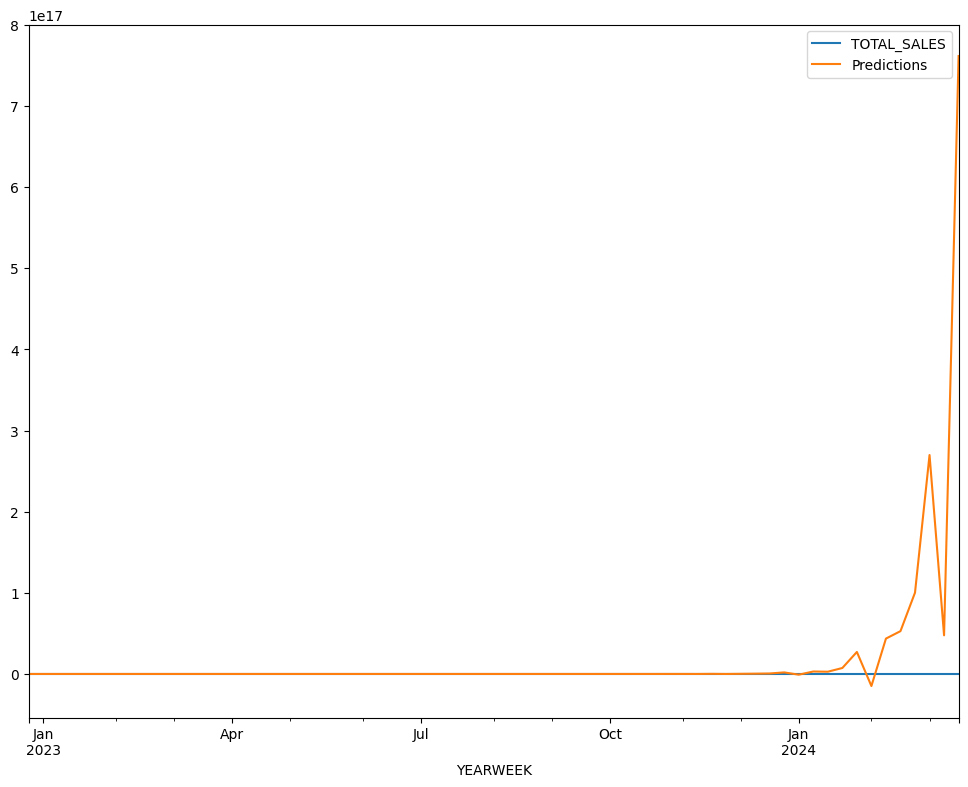

In [43]:
test.plot(figsize=(12,9))

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['TOTAL_SALES'],test['Predictions']))
print(rmse)

1.0159207186399072e+17
